Pattern and Anomaly Detection Lab Experiment 6A

## ARIMA 

Reeha Parkar

IBM AIML Batch - AIML1

BE Electronics 

**60001180046**

In [ ]:
%matplotlib inline

import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
%pip install pmdarima

     |████████████████████████████████| 1.4 MB 28.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import files
  
test = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(test['data.csv']),index_col='DATE',parse_dates=True)
print(df.head())
print(df.shape)

            MinTemp  MaxTemp  AvgTemp
DATE                                 
2014-01-01     33.0     46.0     40.0
2014-01-02     35.0     50.0     43.0
2014-01-03     36.0     45.0     41.0
2014-01-04     32.0     41.0     37.0
2014-01-05     24.0     38.0     31.0
(1825, 3)


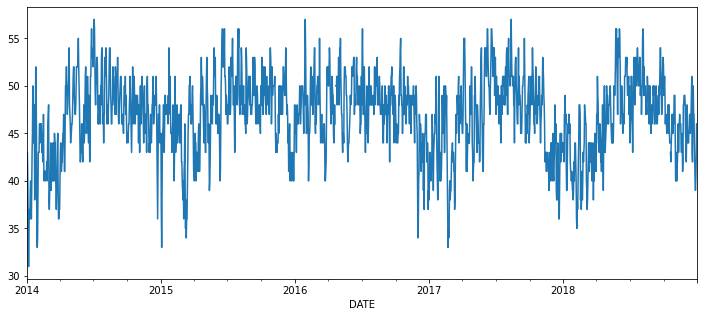

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))
df = df.fillna(method='ffill')

In [ ]:
# Data looks almost stationary because the mean is almost constant

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['AvgTemp'])

1. ADF :  -6.601274820146742
2. P-Value :  6.726253387024665e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1812
5. Critical Values :
	 1% :  -3.4339640110318004
	 5% :  -2.8631363845692475
	 10% :  -2.567619862152732


In [ ]:
# Lesser the ADF value, better the data. So -6.6 is an indication of better data
# Lags ae basically how many previous values are used to get the current value

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Applying autoARIMA to enhance the data (make the data stationary)

In [ ]:
stepwise_fit = auto_arima(df['AvgTemp'],suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4146.995
Date:                Thu, 16 Dec 2021   AIC                           8309.990
Time:                        05:55:33   BIC                           8354.065
Sample:                             0   HQIC                          8326.248
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3161      0.386      3.407      0.001       0.559       2.073
ar.L1          0.9717      0.008    116.852      0.000       0.955       0.988
ma.L1         -0.1203      0.024     -5.047      0.000      -0.167      -0.074
ma.L2         -0.2204      0.024     -9.112      0.000      -0.268      -0.173
ma.L3         -0.1999      0.024     -8.338      0.000      -0.247      -0.153
ma.L4         -0.1336      0.023     -5.874      0.000      -0.178      -0.089
ma.L5         -0.0471      0.024     -1.935      0.053      -0.095       0.001
sigma2         5.4802      0.171     32.058      0.000       5.145       5.815
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                21.46
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# ar.L1 means that auto regression level one was applied
# ma.L5 means that Moving average was applied, but 5 levels were needed to make the data stationary 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train = df.iloc[:-30] # 0->1795 = Training data
test = df.iloc[-30:] # 1796->1825 = Test data
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1825, 3)
(1795, 3) (30, 3)
MinTemp    36.0
MaxTemp    52.0
AvgTemp    44.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp    39.0
MaxTemp    52.0
AvgTemp    46.0
Name: 2018-12-30 00:00:00, dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['AvgTemp'],order=(1,0,5))   # order = (levels of AR, 0, levels of MA required)
model = model.fit()
model.summary() # training the ARIMA model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1795
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4077.524
Date:                Thu, 16 Dec 2021   AIC                           8171.048
Time:                        06:00:18   BIC                           8214.990
Sample:                    01-01-2014   HQIC                          8187.271
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5855      0.756     61.590      0.000      45.103      48.068
ar.L1          0.9856      0.005    188.257      0.000       0.975       0.996
ma.L1         -0.1400      0.023     -6.077      0.000      -0.185      -0.095
ma.L2         -0.2278      0.023     -9.700      0.000      -0.274      -0.182
ma.L3         -0.2147      0.023     -9.177      0.000      -0.261      -0.169
ma.L4         -0.1481      0.023     -6.514      0.000      -0.193      -0.104
ma.L5         -0.0614      0.024     -2.522      0.012      -0.109      -0.014
sigma2         5.4986      0.173     31.700      0.000       5.159       5.839
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.25
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

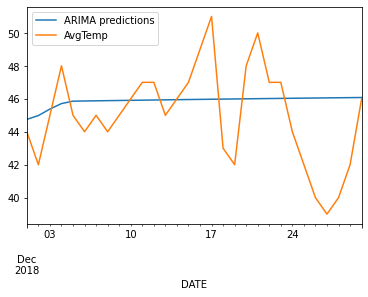

In [ ]:
start = len(train)
end = len(train)+len(test)-1
# If the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
# index_future_dates = pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index = index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

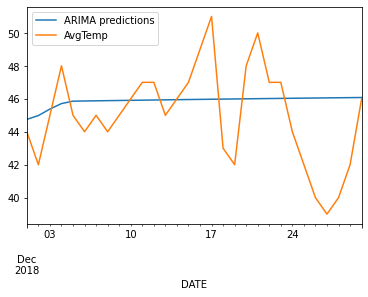

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [ ]:
test['AvgTemp'].mean()

45.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.9992307691204725


In [ ]:
model2 = ARIMA(df['AvgTemp'],order=(1,0,5)) # second model, for predicting future values
model2 = model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp
DATE,,,
2018-12-26,35.0,45.0,40.0
2018-12-27,33.0,44.0,39.0
2018-12-28,33.0,47.0,40.0
2018-12-29,36.0,47.0,42.0
2018-12-30,39.0,52.0,46.0


In [ ]:
# Predicting future values:
index_future_dates = pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred = model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index = index_future_dates
print(pred)

2018-12-30    46.422722
2018-12-31    46.118450
2019-01-01    45.627801
2019-01-02    45.257945
2019-01-03    45.120144
2019-01-04    45.139903
2019-01-05    45.159386
2019-01-06    45.178595
2019-01-07    45.197535
2019-01-08    45.216210
2019-01-09    45.234623
2019-01-10    45.252778
2019-01-11    45.270678
2019-01-12    45.288328
2019-01-13    45.305730
2019-01-14    45.322888
2019-01-15    45.339805
2019-01-16    45.356486
2019-01-17    45.372933
2019-01-18    45.389149
2019-01-19    45.405138
2019-01-20    45.420902
2019-01-21    45.436446
2019-01-22    45.451772
2019-01-23    45.466883
2019-01-24    45.481782
2019-01-25    45.496472
2019-01-26    45.510957
2019-01-27    45.525238
2019-01-28    45.539319
2019-01-29    45.553203
Freq: D, Name: ARIMA Predictions, dtype: float64


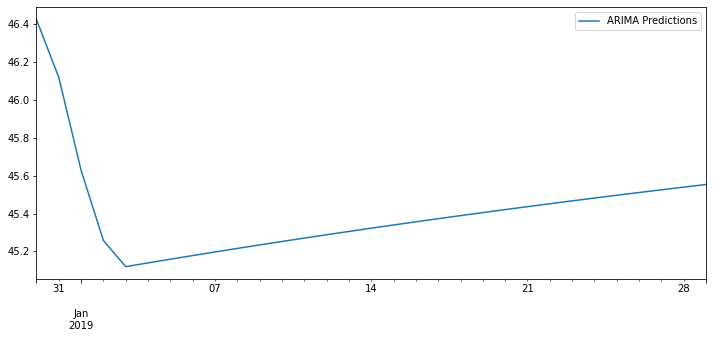

In [ ]:
# Plotting the future value:
pred.plot(figsize=(12,5),legend=True)